# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

%matplotlib inline

**1. Загрузить датасет**

In [2]:
data = pd.read_csv("creditcard.csv")

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

отсутствующих значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

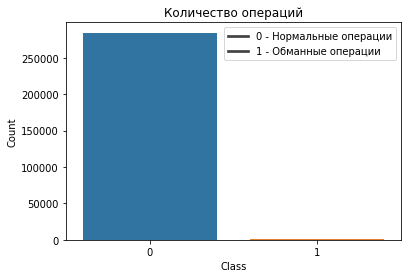

In [4]:
cg = data.groupby("Class").count().reset_index()
cg.rename(index=str, columns={"V1": "Count"}, inplace=True)
g = sns.barplot(x="Class", y="Count", data=cg)
plt.legend(['0 - Нормальные операции','1 - Обманные операции'])
plt.title("Количество операций")
plt.show()

In [5]:
cg.Count

0    284315
1       492
Name: Count, dtype: int64

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [6]:
data.groupby('Class').Amount.sum()

Class
0    2.510246e+07
1    6.012797e+04
Name: Amount, dtype: float64

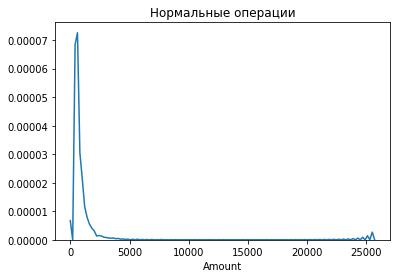

In [7]:
h = data.loc[data.Class == 0]
sns.distplot(h.Amount, hist=False)
plt.title("Нормальные операции")
plt.show()

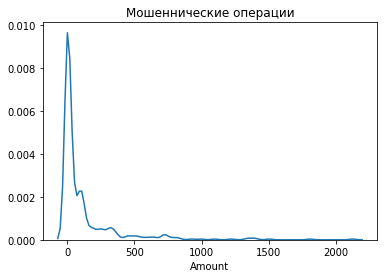

In [8]:
f = data.loc[data.Class == 1]
sns.distplot(f.Amount, hist=False)
plt.title("Мошеннические операции")
plt.show()

**5. Построить графики histograms для всех значений**

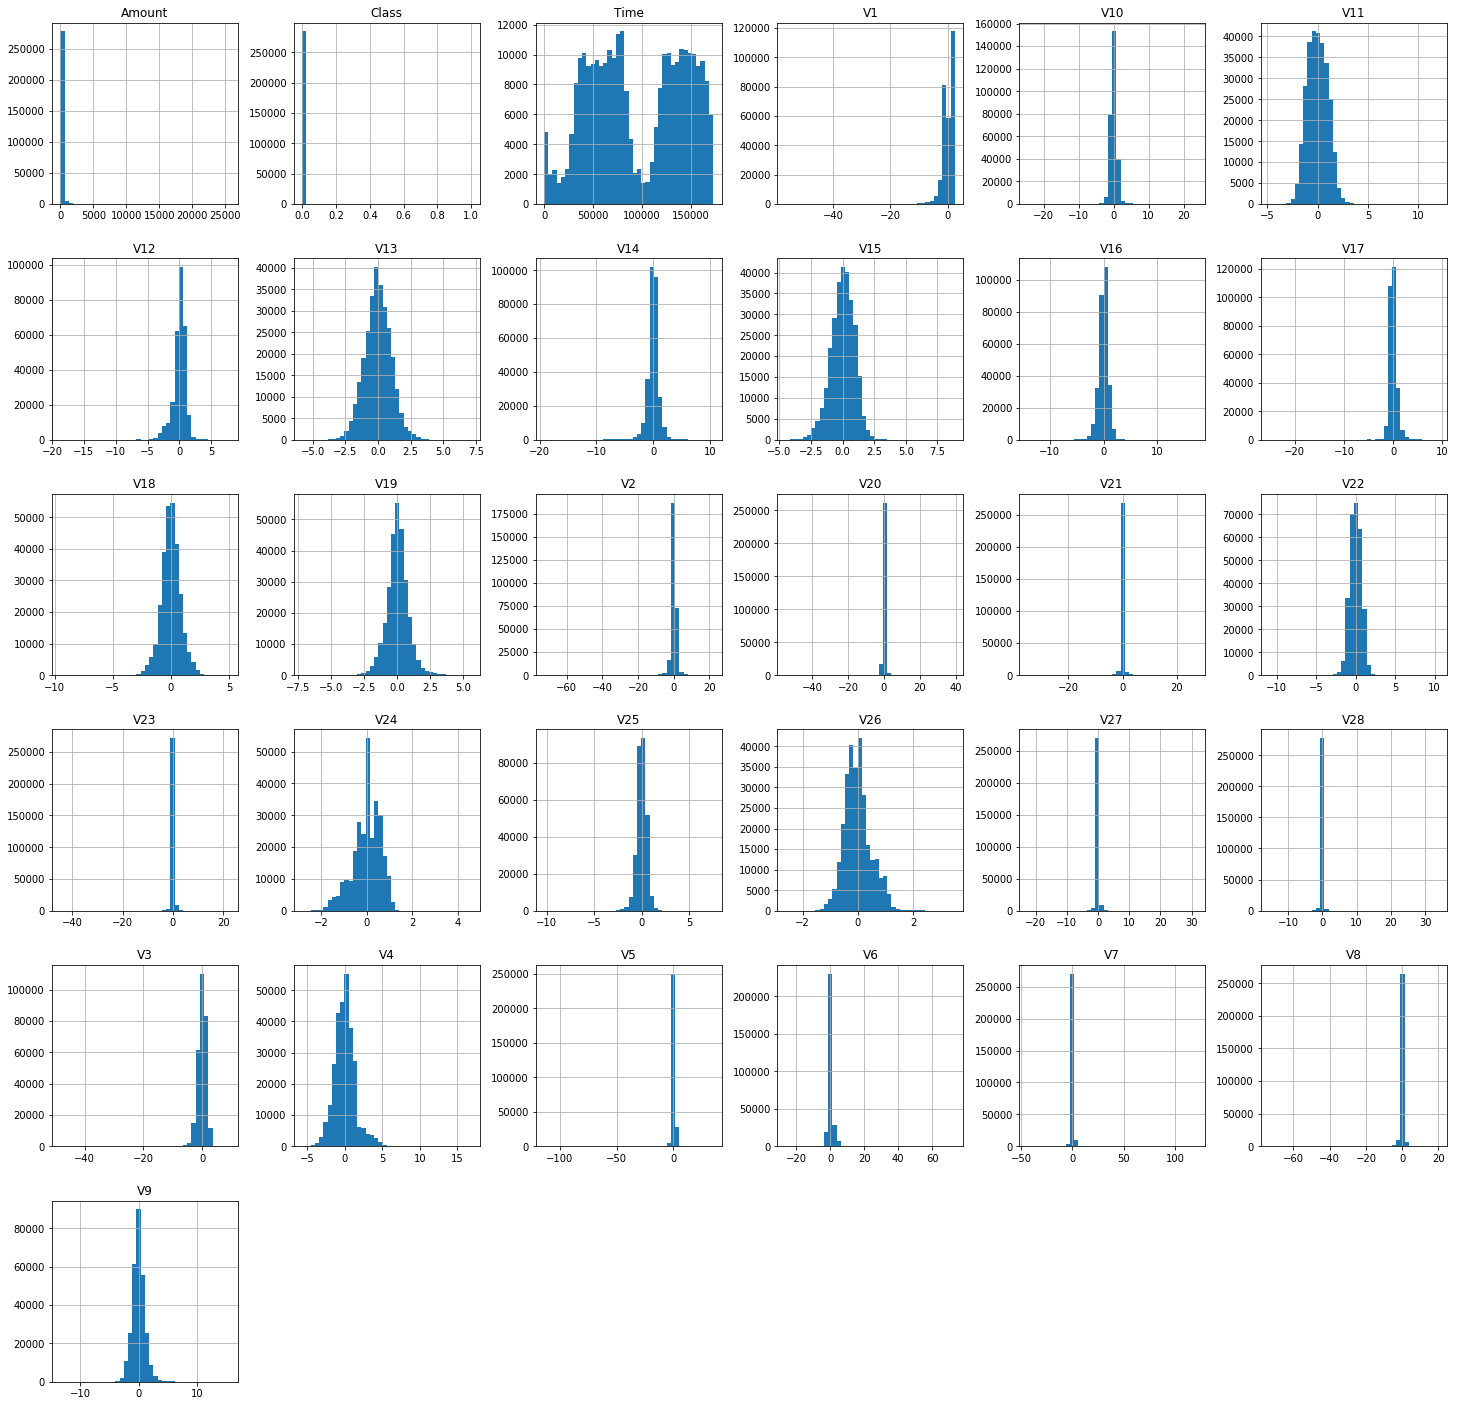

In [9]:
data.hist(bins=40)
plt.gcf().set_size_inches(25,25)
plt.show()

**6. Построить матрицу корреляций для всех значений**

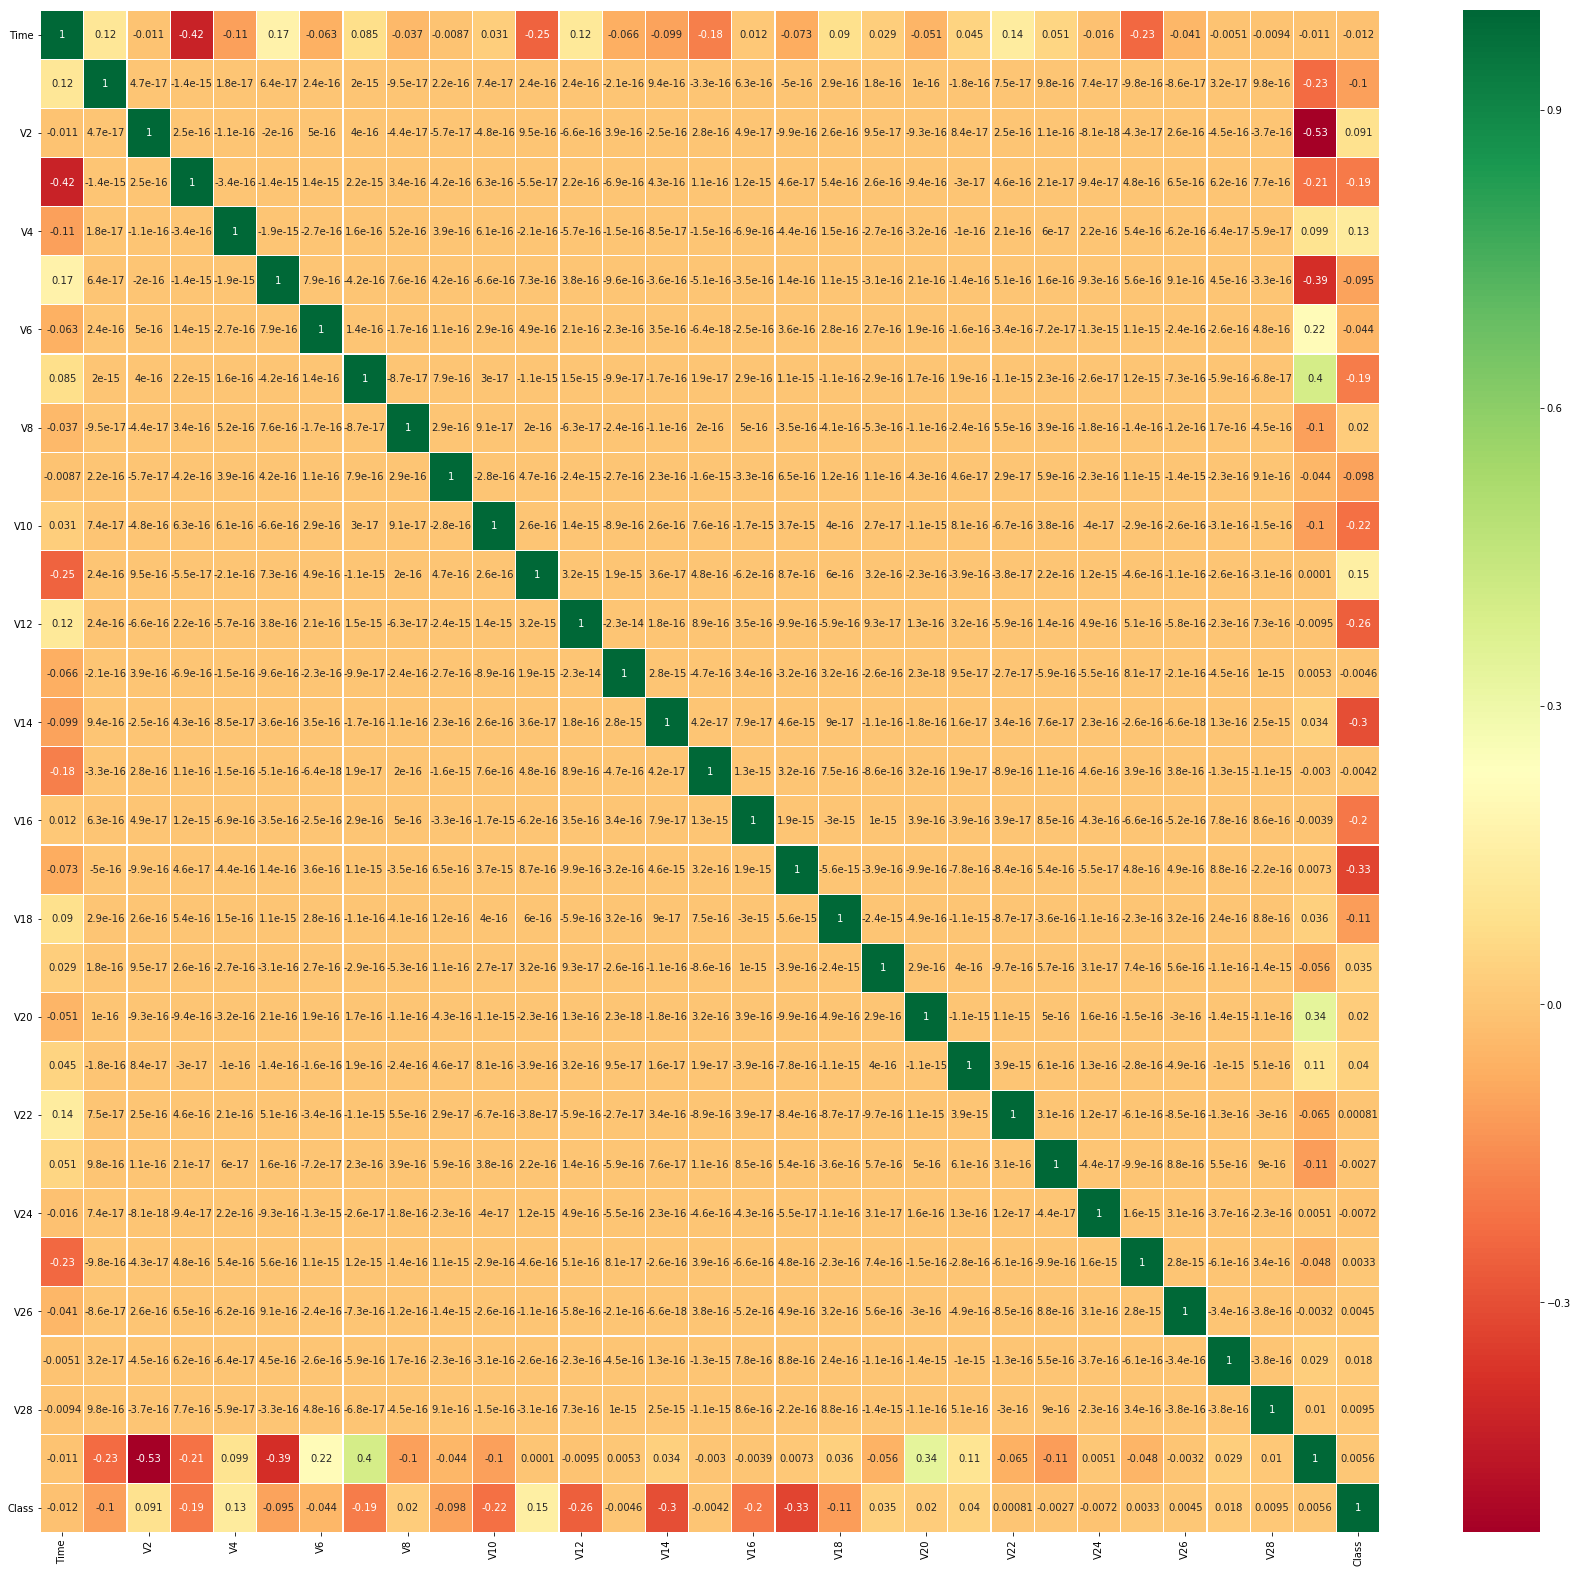

In [10]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap='RdYlGn', linewidths=0.1)
plt.gcf().set_size_inches(30,28)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def train(X, y) :
    # split data to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # construct linear regression model
    model = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)

    y_model = np.around(model.predict(np.array(X_test).reshape(-1,1))).astype("int")

    # y_test.value_counts()
    return pd.DataFrame({"V17" : X_test, "Class (real)" : y_test, "Class (model)" : y_model}).sort_values("Class (real)", ascending=False)

def calc_model_quality(m) :
    true_positive = m[(m["Class (real)"] == 1) &(m["Class (model)"] == 1)]
    true_negative = m[(m["Class (real)"] == 0) &(m["Class (model)"] == 0)]
    false_positive = m[(m["Class (real)"] == 0) &(m["Class (model)"] == 1)]
    false_negative = m[(m["Class (real)"] == 1) &(m["Class (model)"] == 0)]

    return (
        100. * len(true_positive) / len(m),
        100. * len(true_negative) / len(m),
        100. * len(false_positive) / len(m),
        100. * len(false_negative) / len(m)
    )

In [12]:
# choose most correleted data column for Class column - its V17
md = train(data.V17, data.Class)
# show head 10 lines and tail 10 lines
md.iloc[np.r_[0:10, -10:0]]

,V17,Class (real),Class (model)
142557,-0.566390,1,0
10897,-12.602596,1,0
6903,-2.760097,1,0
94218,-8.760786,1,0
223572,-5.709087,1,0
143728,-9.338938,1,0
252774,-1.558545,1,0
124087,4.152086,1,0
151011,-17.270985,1,0
124115,-0.370333,1,0


In [13]:
mq = calc_model_quality(md)
print("Качество модели: успех класс 1: {0:.2f}%, успех класс 0: {1:.2f}%, ложно позитивно: {2:.2f}%, ложно негативно: {3:.2f}%"
      .format(
          mq[0],
          mq[1],
          mq[2],
          mq[3],
          ))

Качество модели: успех класс 1: 0.00%, успех класс 0: 99.82%, ложно позитивно: 0.00%, ложно негативно: 0.18%


По результатам видно что модель не работает. Видимо влияет несбалансированность классов

In [14]:
hd = data[data.Class==0]
fd = data[data.Class==1]

#calc class 1 count
fcc = len(fd)

data2 = hd.sample(n=fcc, random_state=42).append(fd)
md2 = train(data2.V17, data2.Class)
# show head 10 lines and tail 10 lines
md2.iloc[np.r_[0:10, -10:0]]

,V17,Class (real),Class (model)
203700,0.462929,1,0
76929,-4.377106,1,1
214662,-5.856998,1,1
40085,3.902825,1,0
102446,-6.248145,1,1
233258,-4.815863,1,1
238222,-9.285186,1,1
223618,-4.368986,1,1
163149,-9.567268,1,1
6108,-12.598419,1,1


**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [15]:
mq2 = calc_model_quality(md2)
print("Качество модели: успех класс 1: {0:.2f}%, успех класс 0: {1:.2f}%, ложно позитивно: {2:.2f}%, ложно негативно: {3:.2f}%"
      .format(
          mq2[0],
          mq2[1],
          mq2[2],
          mq2[3]
          ))

Качество модели: успех класс 1: 30.46%, успех класс 0: 46.19%, ложно позитивно: 0.00%, ложно негативно: 23.35%


получилось улучшить качество модели за счет сбалансированности классов

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

In [16]:
def show_boxplots_for(d, r) :
    for i in r :
        sns.boxplot(x = "Class", y=i, data=d)
        plt.show()

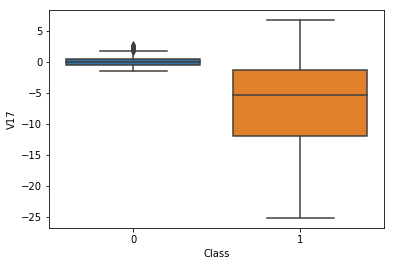

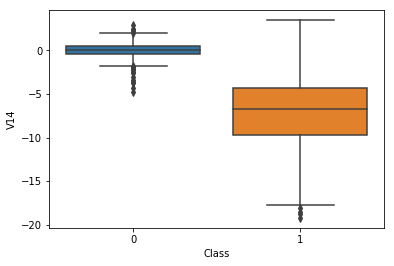

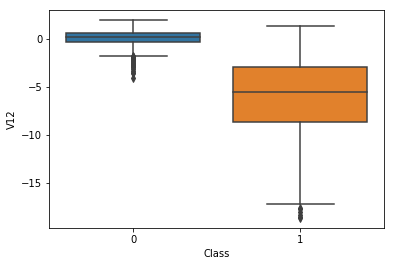

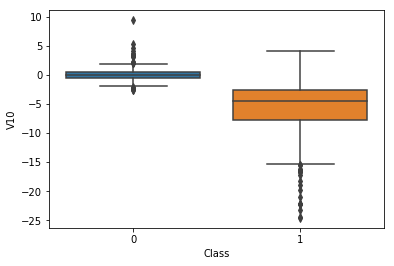

In [17]:
negative_corr = ["V17", "V14", "V12", "V10"]
show_boxplots_for(data2, negative_corr)

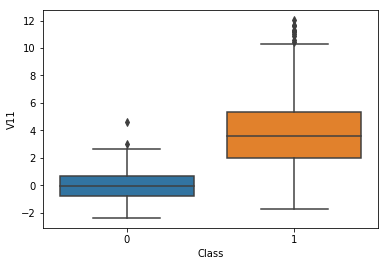

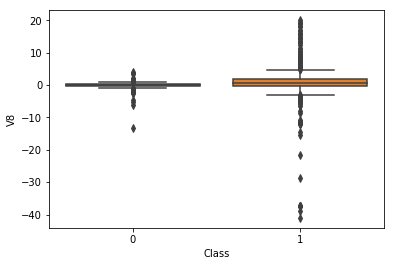

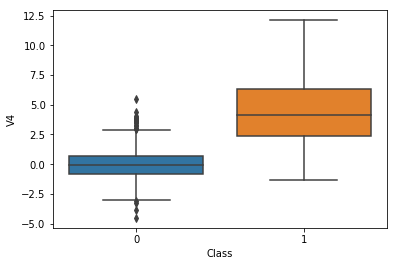

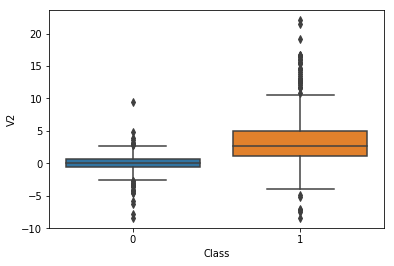

In [18]:
positive_corr = ["V11", "V8", "V4", "V2"]
show_boxplots_for(data2, positive_corr)

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [19]:
def find_excess_index(d, c) :
    # calc interquartile interval
    interval = d[c].quantile([.25, .75])
    return list(d[(d[c] < interval.iloc[0]) | (d[c] > interval.iloc[1])].index)

data3 = data2.drop(find_excess_index(data2, "V17"))

md3 = train(data3.V17, data3.Class)
# show head 10 lines and tail 10 lines
md3.iloc[np.r_[0:10, -10:0]]

,V17,Class (real),Class (model)
44001,-4.674667,1,1
221041,-2.819906,1,1
52584,-5.248646,1,1
83297,-3.948312,1,1
201601,-3.035166,1,1
152019,-5.160213,1,1
83053,-5.071450,1,1
226877,-5.056010,1,1
247995,-3.082274,1,1
151807,-3.354638,1,1


In [20]:
mq3 = calc_model_quality(md3)
print("Качество модели: успех класс 1: {0:.2f}%, успех класс 0: {1:.2f}%, ложно позитивно: {2:.2f}%, ложно негативно: {3:.2f}%"
      .format(
          mq3[0],
          mq3[1],
          mq3[2],
          mq3[3]
          ))

Качество модели: успех класс 1: 24.24%, успех класс 0: 68.69%, ложно позитивно: 0.00%, ложно негативно: 7.07%


Модель получилось улучшить. Сказалось отсечение выбросов.